<a href="https://colab.research.google.com/github/anstjsdud/pdm07/blob/master/py-tensorflow/tf2_4_mnist_FCN_test_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Test of mnist FCN model**
- FCN2
- FCN3
- FCN4
- FCN5

***

![mnist_NN_2_layers](https://raw.githubusercontent.com/Redwoods/Py/master/pdm2020/my-note/py-tensorflow/images/mnist_NN_2_layers.png)

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.3.0


## **데이터 로딩, 정규화**

In [12]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test.shape))

X_train=(60000, 28, 28)
y_train=(60000,)
X_test=(10000, 28, 28)
y_test=(10000,)


In [13]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## **FCN2**

In [14]:
fcn2 = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

fcn2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [15]:
fcn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
fcn2.fit(X_train, y_train, epochs = 20,  batch_size = 32)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3076 - accuracy: 0.9101
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1535 - accuracy: 0.9543
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1154 - accuracy: 0.9649
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0973 - accuracy: 0.9700
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0831 - accuracy: 0.9745
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0738 - accuracy: 0.9759
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9785
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0621 - accuracy: 0.9793
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0557 - accuracy: 0.9820
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.051

In [17]:
fcn2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0768 - accuracy: 0.9803


[0.07679206877946854, 0.9803000092506409]

## **FCN3**

In [18]:
fcn3 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [19]:
fcn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
________________________________________________

In [20]:
fcn3.fit(X_train,y_train, epochs= 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2814 - accuracy: 0.9139
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1324 - accuracy: 0.9589
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1035 - accuracy: 0.9680
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0866 - accuracy: 0.9729
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0763 - accuracy: 0.9757
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0675 - accuracy: 0.9788
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0622 - accuracy: 0.9801
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0553 - accuracy: 0.9822
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0542 - accuracy: 0.9829
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.048

In [21]:
fcn3.evaluate(X_test, y_test, batch_size= 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0649 - accuracy: 0.9841


[0.06494191288948059, 0.9840999841690063]

## **FCN4**

In [23]:
fcn4 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [24]:
fcn4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)               

In [25]:
fcn4.fit(X_train, y_train, epochs = 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3419 - accuracy: 0.8981
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1598 - accuracy: 0.9550
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1270 - accuracy: 0.9631
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1084 - accuracy: 0.9688
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0935 - accuracy: 0.9727
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0855 - accuracy: 0.9748
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0739 - accuracy: 0.9780
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0693 - accuracy: 0.9788
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9809
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.060

In [26]:
fcn4.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0879 - accuracy: 0.9825


[0.08787555247545242, 0.9825000166893005]

## **FCN5**

In [27]:
fcn5 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [28]:
fcn5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)               

In [29]:
fcn5.fit(X_train, y_train, epochs=20, batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4692 - accuracy: 0.8637
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2107 - accuracy: 0.9457
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1626 - accuracy: 0.9580
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1405 - accuracy: 0.9645
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1211 - accuracy: 0.9682
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1133 - accuracy: 0.9711
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1005 - accuracy: 0.9738
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0952 - accuracy: 0.9764
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0860 - accuracy: 0.9772
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.078

In [30]:
fcn5.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0947 - accuracy: 0.9813


[0.09468461573123932, 0.9812999963760376]

# **[DIY] Hidden layer에 따른 정확도**

In [31]:
fcn_result = [[0.07679206877946854, 0.9803000092506409], 
 [0.06494191288948059, 0.9840999841690063], 
 [0.08787555247545242, 0.9825000166893005], 
 [0.09468461573123932, 0.9812999963760376]]

In [32]:
# select accuracies
accuracy = [row[1] for row in fcn_result]
accuracy

[0.9803000092506409,
 0.9840999841690063,
 0.9825000166893005,
 0.9812999963760376]

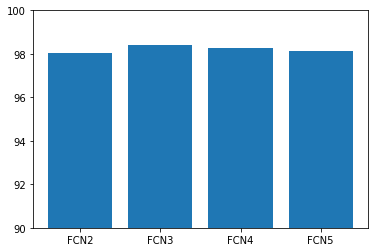

In [34]:
x = np.arange(4)
fcns = ['FCN2','FCN3','FCN4','FCN5']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, fcns)
plt.ylim((90,100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [35]:
fcn3.save('fcn3_best.hdf5')

In [36]:
from keras.models import load_model

model = load_model('fcn3_best.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0649 - accuracy: 0.9841


[0.06494191288948059, 0.9840999841690063]

http://life21c.inje.ac.kr:7777